In [ ]:
import kagglehub
path = kagglehub.dataset_download("wasiqbakhs/financial-dateset")
print("Path to dataset files:", path)

100%|██████████| 2.10G/2.10G [01:39<00:00, 22.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/wasiqbakhs/financial-dateset/versions/1


In [ ]:
import os
print("Dataset root:", path)
print(os.listdir(path))

Dataset root: /root/.cache/kagglehub/datasets/wasiqbakhs/financial-dateset/versions/1
['full_history', 'All_external.csv']


In [ ]:
NEWS_RAW = os.path.join(path, "All_external.csv")
STOCK_DIR = os.path.join(path, "full_history")

In [ ]:
import os
NEWS_RAW = os.path.join(path, "All_external.csv")
STOCK_DIR = os.path.join(path, "full_history")
print(NEWS_RAW)
print(STOCK_DIR)
print(os.listdir(STOCK_DIR))

/root/.cache/kagglehub/datasets/wasiqbakhs/financial-dateset/versions/1/All_external.csv
/root/.cache/kagglehub/datasets/wasiqbakhs/financial-dateset/versions/1/full_history
['full_history']


In [ ]:
import pandas as pd
import os
BASE = "/root/.cache/kagglehub/datasets/wasiqbakhs/financial-dateset/versions/1"
NEWS_PATH = os.path.join(BASE, "All_external.csv")
news_df = pd.read_csv(NEWS_PATH, low_memory=False)
print("News shape:", news_df.shape)
news_df.head()

News shape: (13057514, 11)


,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary
0,2020-06-05 06:30:54 UTC,Stocks That Hit 52-Week Highs On Friday,A,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-03 06:45:20 UTC,Stocks That Hit 52-Week Highs On Wednesday,A,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-26 00:30:07 UTC,71 Biggest Movers From Friday,A,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-22 08:45:06 UTC,46 Stocks Moving In Friday's Mid-Day Session,A,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-22 07:38:59 UTC,B of A Securities Maintains Neutral on Agilent...,A,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import glob
STOCK_DIR = os.path.join(BASE, "full_history/full_history")
stock_files = glob.glob(STOCK_DIR + "/*.csv")
print("Number of stock price files found:", len(stock_files))

Number of stock price files found: 7693


In [ ]:
dfs = []
for f in stock_files:
    try:
        df_temp = pd.read_csv(f)
        df_temp["ticker"] = os.path.basename(f).replace(".csv", "")
        dfs.append(df_temp)
    except Exception as e:
        print("Error reading:", f, e)
stock_df = pd.concat(dfs, ignore_index=True)
print("Final stock df shape:", stock_df.shape)
stock_df.head()

Final stock df shape: (29677722, 8)


,date,volume,open,high,low,close,adj close,ticker
0,2020-07-02,157800.0,227.660004,228.380005,224.500000,225.100006,225.100006,IJK
1,2020-07-01,653500.0,224.500000,225.809998,222.919998,224.029999,224.029999,IJK
2,2020-06-30,119500.0,220.600006,224.789993,220.600006,224.020004,224.020004,IJK
3,2020-06-29,43200.0,218.869995,221.710007,216.960007,221.139999,221.139999,IJK
4,2020-06-26,43000.0,219.729996,220.139999,216.770004,217.369995,217.369995,IJK


In [ ]:
import pandas as pd
news = news_df.copy()
news["Date"] = pd.to_datetime(news["Date"], errors="coerce", utc=True)
news["date"] = news["Date"].dt.date
news["Stock_symbol"] = news["Stock_symbol"].astype(str).str.upper().str.strip()
news["headline"] = news["Article_title"].astype(str).str.strip()
news = news[news["headline"].notna() & (news["headline"].str.len() > 3)]
print("News cleaned:", news.shape)
news.head()

News cleaned: (13057343, 13)


,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary,date,headline
0,2020-06-05 06:30:54+00:00,Stocks That Hit 52-Week Highs On Friday,A,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-05,Stocks That Hit 52-Week Highs On Friday
1,2020-06-03 06:45:20+00:00,Stocks That Hit 52-Week Highs On Wednesday,A,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-03,Stocks That Hit 52-Week Highs On Wednesday
2,2020-05-26 00:30:07+00:00,71 Biggest Movers From Friday,A,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-26,71 Biggest Movers From Friday
3,2020-05-22 08:45:06+00:00,46 Stocks Moving In Friday's Mid-Day Session,A,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,46 Stocks Moving In Friday's Mid-Day Session
4,2020-05-22 07:38:59+00:00,B of A Securities Maintains Neutral on Agilent...,A,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,B of A Securities Maintains Neutral on Agilent...


In [ ]:
stock = stock_df.copy()
stock["date"] = pd.to_datetime(stock["date"], errors="coerce").dt.date
stock["ticker"] = stock["ticker"].astype(str).str.upper().str.strip()
stock = stock.dropna(subset=["close"])
stock = stock.drop_duplicates(subset=["ticker", "date"])
print("Stock cleaned:", stock.shape)
stock.head()

Stock cleaned: (29677465, 8)


,date,volume,open,high,low,close,adj close,ticker
0,2020-07-02,157800.0,227.660004,228.380005,224.500000,225.100006,225.100006,IJK
1,2020-07-01,653500.0,224.500000,225.809998,222.919998,224.029999,224.029999,IJK
2,2020-06-30,119500.0,220.600006,224.789993,220.600006,224.020004,224.020004,IJK
3,2020-06-29,43200.0,218.869995,221.710007,216.960007,221.139999,221.139999,IJK
4,2020-06-26,43000.0,219.729996,220.139999,216.770004,217.369995,217.369995,IJK


In [ ]:
merged = news.merge(
    stock,
    left_on=["date", "Stock_symbol"],
    right_on=["date", "ticker"],
    how="inner"
)
print("Merged shape:", merged.shape)
merged.head()

Merged shape: (11304716, 20)


,Date,Article_title,Stock_symbol,Url,Publisher,Author,Article,Lsa_summary,Luhn_summary,Textrank_summary,Lexrank_summary,date,headline,volume,open,high,low,close,adj close,ticker
0,2020-06-05 06:30:54+00:00,Stocks That Hit 52-Week Highs On Friday,A,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-05,Stocks That Hit 52-Week Highs On Friday,2844700.0,92.129997,93.040001,90.089996,90.379997,88.321449,A
1,2020-06-03 06:45:20+00:00,Stocks That Hit 52-Week Highs On Wednesday,A,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,1382500.0,90.650002,91.139999,90.260002,90.489998,88.428940,A
2,2020-05-26 00:30:07+00:00,71 Biggest Movers From Friday,A,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-26,71 Biggest Movers From Friday,3173400.0,86.230003,86.790001,85.639999,86.129997,84.168251,A
3,2020-05-22 08:45:06+00:00,46 Stocks Moving In Friday's Mid-Day Session,A,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,5063100.0,85.000000,87.669998,84.199997,84.980003,83.044434,A
4,2020-05-22 07:38:59+00:00,B of A Securities Maintains Neutral on Agilent...,A,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-22,B of A Securities Maintains Neutral on Agilent...,5063100.0,85.000000,87.669998,84.199997,84.980003,83.044434,A


In [ ]:
merged.to_parquet("merged_cleaned.parquet")
stock.to_parquet("stock_cleaned.parquet")
news.to_parquet("news_cleaned.parquet")
print("Saved cleaned datasets.")

Saved cleaned datasets.


In [ ]:
news_small = news[["date", "Stock_symbol", "headline"]].copy()
news_small = news_small.rename(columns={"Stock_symbol": "ticker"})
news_small.head()

,date,ticker,headline
0,2020-06-05,A,Stocks That Hit 52-Week Highs On Friday
1,2020-06-03,A,Stocks That Hit 52-Week Highs On Wednesday
2,2020-05-26,A,71 Biggest Movers From Friday
3,2020-05-22,A,46 Stocks Moving In Friday's Mid-Day Session
4,2020-05-22,A,B of A Securities Maintains Neutral on Agilent...


In [ ]:
from textblob import TextBlob
from tqdm import tqdm
import numpy as np
chunk_size = 300000
sent_rows = []
for start in tqdm(range(0, len(news_small), chunk_size)):
    chunk = news_small.iloc[start:start+chunk_size].copy()
    chunk["sentiment"] = chunk["headline"].apply(
        lambda x: TextBlob(x).sentiment.polarity if isinstance(x, str) else 0
    )

    sent_rows.append(chunk)
news_sent = pd.concat(sent_rows, ignore_index=True)


100%|██████████| 44/44 [34:59<00:00, 47.72s/it]


In [ ]:
sent_daily = (
    news_sent.groupby(["ticker", "date"])["sentiment"]
    .agg(["mean", "count"])
    .reset_index()
)
sent_daily = sent_daily.rename(columns={"mean": "sent_mean", "count": "news_count"})
sent_daily.head()

,ticker,date,sent_mean,news_count
0,A,2009-04-29,0.0,1
1,A,2009-06-01,0.0,1
2,A,2009-07-14,0.0,1
3,A,2009-07-30,0.0,1
4,A,2009-08-04,0.0,1


In [ ]:
sent_daily.to_parquet("sentiment_daily.parquet")
print("Saved sentiment_daily.parquet")

Saved sentiment_daily.parquet


In [ ]:
sent_daily = pd.read_parquet("sentiment_daily.parquet")
stock_df = stock_df.copy()
stock_df["date"] = pd.to_datetime(stock_df["date"]).dt.date
sent_daily["date"] = pd.to_datetime(sent_daily["date"]).dt.date
sent_daily["ticker"] = sent_daily["ticker"].str.upper()
merged = pd.merge(
    stock_df,
    sent_daily,
    on=["ticker", "date"],
    how="left"
)
merged["sent_mean"] = merged["sent_mean"].fillna(0.0)
merged["news_count"] = merged["news_count"].fillna(0).astype(int)
print("Merged shape:", merged.shape)
merged.head()

Merged shape: (29677722, 10)


,date,volume,open,high,low,close,adj close,ticker,sent_mean,news_count
0,2020-07-02,157800.0,227.660004,228.380005,224.500000,225.100006,225.100006,IJK,0.0,0
1,2020-07-01,653500.0,224.500000,225.809998,222.919998,224.029999,224.029999,IJK,0.0,0
2,2020-06-30,119500.0,220.600006,224.789993,220.600006,224.020004,224.020004,IJK,0.0,0
3,2020-06-29,43200.0,218.869995,221.710007,216.960007,221.139999,221.139999,IJK,0.0,0
4,2020-06-26,43000.0,219.729996,220.139999,216.770004,217.369995,217.369995,IJK,0.0,0


In [ ]:
merged = merged.sort_values(["ticker", "date"])
merged["prev_close"] = merged.groupby("ticker")["close"].shift(1)
merged["prev_return"] = (merged["close"] - merged["prev_close"]) / merged["prev_close"]
merged["prev_return"] = merged["prev_return"].fillna(0.0)

In [ ]:
merged["next_close"] = merged.groupby("ticker")["close"].shift(-1)
merged = merged.dropna(subset=["next_close"]).copy()
merged["movement"] = (merged["next_close"] > merged["close"]).astype(int)

In [ ]:
merged["sent_3d"] = (
    merged.groupby("ticker")["sent_mean"]
    .rolling(3).mean().reset_index(0, drop=True)
)
merged["sent_7d"] = (
    merged.groupby("ticker")["sent_mean"]
    .rolling(7).mean().reset_index(0, drop=True)
)
merged[["sent_3d", "sent_7d"]] = merged[["sent_3d", "sent_7d"]].fillna(0)

In [ ]:
merged["volatility_7d"] = (
    merged.groupby("ticker")["prev_return"]
    .rolling(7).std().reset_index(0, drop=True)
)
merged["volatility_7d"] = merged["volatility_7d"].fillna(0)

In [ ]:
merged["vol_3d"] = (
    merged.groupby("ticker")["volume"]
    .rolling(3).mean().reset_index(0, drop=True)
)
merged["vol_7d"] = (
    merged.groupby("ticker")["volume"]
    .rolling(7).mean().reset_index(0, drop=True)
)
merged[["vol_3d", "vol_7d"]] = merged[["vol_3d", "vol_7d"]].fillna(0)

In [ ]:
merged.to_parquet("final_ml_dataset.parquet")
print("Saved → final_ml_dataset.parquet")

Saved → final_ml_dataset.parquet


In [ ]:
import pandas as pd
df = pd.read_parquet("final_ml_dataset.parquet")
print(df.columns)

Index(['date', 'volume', 'open', 'high', 'low', 'close', 'adj close', 'ticker',
       'sent_mean', 'news_count', 'prev_close', 'prev_return', 'next_close',
       'movement', 'sent_3d', 'sent_7d', 'volatility_7d', 'vol_3d', 'vol_7d'],
      dtype='object')


In [ ]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test  = X_test.replace([np.inf, -np.inf], np.nan)
for col in FEATURES:
    X_train[col] = np.where(np.abs(X_train[col]) > 1e6, np.nan, X_train[col])
    X_test[col]  = np.where(np.abs(X_test[col])  > 1e6, np.nan, X_test[col])
X_train = X_train.fillna(0.0)
X_test  = X_test.fillna(0.0)
print("Any NaNs left? train:", X_train.isna().sum().sum(), " test:", X_test.isna().sum().sum())

Any NaNs left? train: 0  test: 0


In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

print("Loading dataset...")
df = pd.read_parquet("/content/final_ml_dataset.parquet")
print("Loaded:", df.shape)
df = df.sort_values("date").reset_index(drop=True)
TRAIN_SPLIT = 0.80
split_idx = int(len(df) * TRAIN_SPLIT)

train_df = df.iloc[:split_idx].copy()
test_df  = df.iloc[split_idx:].copy()

print("Train:", train_df.shape, " | Test:", test_df.shape)

train_df["movement_label"] = train_df["movement"].astype(int)
test_df["movement_label"]  = test_df["movement"].astype(int)

print("\nTRAIN LABEL COUNTS:")
print(train_df["movement_label"].value_counts())

print("\nTEST LABEL COUNTS:")
print(test_df["movement_label"].value_counts())


FEATURES = [
    "sent_mean", "news_count",
    "prev_return",
    "sent_3d", "sent_7d",
    "volatility_7d",
    "vol_3d", "vol_7d"
]

TARGET = "movement_label"

X_train = train_df[FEATURES]
y_train = train_df[TARGET]

X_test  = test_df[FEATURES]
y_test  = test_df[TARGET]


X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test  = X_test.replace([np.inf, -np.inf], np.nan)


for col in FEATURES:
    X_train[col] = np.where(np.abs(X_train[col]) > 1e6, np.nan, X_train[col])
    X_test[col]  = np.where(np.abs(X_test[col])  > 1e6, np.nan, X_test[col])

X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

print("\nAny NaNs left? train:", X_train.isna().sum().sum(),
      " test:", X_test.isna().sum().sum())


scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)


print("\n===== Logistic Regression =====")
log_clf = LogisticRegression(max_iter=2000)
log_clf.fit(X_train_s, y_train)
log_pred = log_clf.predict(X_test_s)

print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))


print("\n===== Random Forest =====")
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

print("\n===== XGBoost =====")

xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42
)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))

print("\n DONE — All Models Trained Successfully!")


Loading dataset...
Loaded: (29669773, 19)
Train: (23735818, 19)  | Test: (5933955, 19)

TRAIN LABEL COUNTS:
movement_label
0    13125464
1    10610354
Name: count, dtype: int64

TEST LABEL COUNTS:
movement_label
0    3030701
1    2903254
Name: count, dtype: int64

Any NaNs left? train: 0  test: 0

===== Logistic Regression =====
Accuracy: 0.510799458371356
              precision    recall  f1-score   support

           0       0.51      0.93      0.66   3030701
           1       0.50      0.07      0.13   2903254

    accuracy                           0.51   5933955
   macro avg       0.51      0.50      0.39   5933955
weighted avg       0.51      0.51      0.40   5933955

Confusion Matrix:
 [[2819750  210951]
 [2691943  211311]]

===== Random Forest =====
Accuracy: 0.514574343755556
              precision    recall  f1-score   support

           0       0.51      0.90      0.66   3030701
           1       0.52      0.11      0.18   2903254

    accuracy                         

In [ ]:
!pip install transformers torch accelerate -q

In [ ]:
import pandas as pd
NEWS_PATH = "/root/.cache/kagglehub/datasets/wasiqbakhs/financial-dateset/versions/1/All_external.csv"
news = pd.read_csv(NEWS_PATH, usecols=["Date", "Article_title", "Stock_symbol"])
news = news.rename(columns={"Stock_symbol": "ticker", "Date": "date"})
news["date"] = pd.to_datetime(news["date"]).dt.date
print("Total news rows:", len(news))
sample_news = news.sample(200_000, random_state=42)
print("Sample shape:", sample_news.shape)
sample_news.head()

/tmp/ipython-input-861826778.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  news = pd.read_csv(NEWS_PATH, usecols=["Date", "Article_title", "Stock_symbol"])


Total news rows: 13057514
Sample shape: (200000, 3)


,date,Article_title,ticker
12573476,2014-07-16,UK approves construction of E.ON offshore wind...,NaN
12297212,2015-10-20,REG-Granite Master Issuer PLC FRN Variable Rat...,NaN
9879560,2007-12-18,Old National Bancorp Increases Quarterly Cash ...,NaN
7498811,2009-04-17,Huge Gauguin masterpiece makes rare visit to J...,NaN
8717940,2010-08-17,REG - Lyxor ETF FTSE 100 - Net Asset Value(s),NaN


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
from tqdm import tqdm
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert").to(device)
label_names = ["negative", "neutral", "positive"]


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
def finbert_predict(batch):
    tokens = tokenizer(batch, padding=True, truncation=True, max_length=128, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**tokens)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return probs.cpu().numpy()

finbert_scores = []
batch_size = 64

texts = sample_news["Article_title"].tolist()

for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i+batch_size]
    scores = finbert_predict(batch)
    finbert_scores.append(scores)

finbert_scores = np.vstack(finbert_scores)


  0%|          | 2/3125 [00:00<21:16,  2.45it/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

100%|██████████| 3125/3125 [11:31<00:00,  4.52it/s]


In [ ]:
sample_news["fin_neg"] = finbert_scores[:, 0]
sample_news["fin_neu"] = finbert_scores[:, 1]
sample_news["fin_pos"] = finbert_scores[:, 2]

sample_news["finbert_sentiment"] = sample_news[["fin_pos", "fin_neg", "fin_neu"]].idxmax(axis=1)
sample_news["finbert_score"] = sample_news["fin_pos"] - sample_news["fin_neg"]

sample_news.head()


,date,Article_title,ticker,fin_neg,fin_neu,fin_pos,finbert_sentiment,finbert_score
12573476,2014-07-16,UK approves construction of E.ON offshore wind...,NaN,0.715864,0.013348,0.270789,fin_neg,-0.445075
12297212,2015-10-20,REG-Granite Master Issuer PLC FRN Variable Rat...,NaN,0.037826,0.019027,0.943147,fin_pos,0.905320
9879560,2007-12-18,Old National Bancorp Increases Quarterly Cash ...,NaN,0.450573,0.386287,0.163140,fin_neg,-0.287433
7498811,2009-04-17,Huge Gauguin masterpiece makes rare visit to J...,NaN,0.098281,0.032211,0.869508,fin_pos,0.771227
8717940,2010-08-17,REG - Lyxor ETF FTSE 100 - Net Asset Value(s),NaN,0.033843,0.023071,0.943086,fin_pos,0.909243


In [ ]:
finbert_daily = sample_news.groupby(["ticker", "date"]).agg(
    finbert_mean=("finbert_score", "mean"),
    finbert_news_count=("finbert_score", "count"),
    fin_pos_mean=("fin_pos", "mean"),
    fin_neg_mean=("fin_neg", "mean")
).reset_index()

finbert_daily.head()


,ticker,date,finbert_mean,finbert_news_count,fin_pos_mean,fin_neg_mean
0,A,2009-09-11,0.862979,1,0.882848,0.019868
1,A,2009-09-13,0.792969,1,0.891041,0.098072
2,A,2010-05-18,0.194446,1,0.593179,0.398734
3,A,2011-12-20,-0.326001,1,0.044709,0.370710
4,A,2012-04-19,-0.521052,1,0.230795,0.751847


In [ ]:
full_df = pd.read_parquet("/content/final_ml_dataset.parquet")
full_df = full_df.merge(finbert_daily, on=["ticker", "date"], how="left")
full_df["finbert_mean"] = full_df["finbert_mean"].fillna(0.0)
full_df["finbert_news_count"] = full_df["finbert_news_count"].fillna(0)
full_df["fin_pos_mean"] = full_df["fin_pos_mean"].fillna(0.0)
full_df["fin_neg_mean"] = full_df["fin_neg_mean"].fillna(0.0)

full_df.to_parquet("final_ml_dataset_finbert.parquet")

full_df.head()


,date,volume,open,high,low,close,adj close,ticker,sent_mean,news_count,...,movement,sent_3d,sent_7d,volatility_7d,vol_3d,vol_7d,finbert_mean,finbert_news_count,fin_pos_mean,fin_neg_mean
0,1999-11-18,62546300.0,32.546494,35.765381,28.612303,31.473534,27.068665,A,0.0,0,...,0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,1999-11-19,15234100.0,30.713520,30.758226,28.478184,28.880543,24.838577,A,0.0,0,...,1,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
2,1999-11-22,6577800.0,29.551144,31.473534,28.657009,31.473534,27.068665,A,0.0,0,...,0,0.0,0.0,0.0,2.811940e+07,0.0,0.0,0.0,0.0,0.0
3,1999-11-23,5975600.0,30.400572,31.205294,28.612303,28.612303,24.607880,A,0.0,0,...,1,0.0,0.0,0.0,9.262500e+06,0.0,0.0,0.0,0.0,0.0
4,1999-11-24,4843200.0,28.701717,29.998211,28.612303,29.372318,25.261524,A,0.0,0,...,1,0.0,0.0,0.0,5.798867e+06,0.0,0.0,0.0,0.0,0.0


In [ ]:
FEATURES += ["finbert_mean", "finbert_news_count", "fin_pos_mean", "fin_neg_mean"]

In [ ]:
print(df["movement"].value_counts(dropna=False))


movement
0    16156165
1    13513608
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

print("Loading dataset...")
df = pd.read_parquet("/content/final_ml_dataset_finbert.parquet")
print("Loaded:", df.shape)
print("\nMovement distribution BEFORE encoding:")
print(df["movement"].value_counts())

df["movement_label"] = df["movement"].astype(int)

print("\nMovement_label distribution:")
print(df["movement_label"].value_counts())
df = df.sort_values("date").reset_index(drop=True)

TRAIN_SPLIT = 0.80
split_idx = int(len(df) * TRAIN_SPLIT)

train_df = df.iloc[:split_idx].copy()
test_df  = df.iloc[split_idx:].copy()

print("\nTrain:", train_df.shape, " | Test:", test_df.shape)

FEATURES = [
    "sent_mean", "news_count",
    "prev_return",
    "sent_3d", "sent_7d",
    "volatility_7d",
    "vol_3d", "vol_7d",

    "finbert_mean",
    "finbert_news_count",
    "fin_pos_mean",
    "fin_neg_mean",
]

TARGET = "movement_label"

X_train = train_df[FEATURES].copy()
y_train = train_df[TARGET].copy()

X_test  = test_df[FEATURES].copy()
y_test  = test_df[TARGET].copy()

X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test  = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

print("Any NaNs left? train:", X_train.isna().sum().sum(),
      " test:", X_test.isna().sum().sum())

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)


print("\n===== Logistic Regression =====")
log_clf = LogisticRegression(max_iter=2000)
log_clf.fit(X_train_s, y_train)
log_pred = log_clf.predict(X_test_s)

print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))

print("\n===== Random Forest =====")
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=14,
    n_jobs=-1,
    random_state=42
)

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

print("\n===== XGBoost =====")

xgb_clf = XGBClassifier(
    n_estimators=350,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42
)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))

print("\n FinBERT + ML Models Completed Successfully!")


Loading dataset...
Loaded: (29669773, 23)

Movement distribution BEFORE encoding:
movement
0    16156165
1    13513608
Name: count, dtype: int64

Movement_label distribution:
movement_label
0    16156165
1    13513608
Name: count, dtype: int64

Train: (23735818, 24)  | Test: (5933955, 24)
Any NaNs left? train: 0  test: 0

===== Logistic Regression =====
Accuracy: 0.5108353534868397
              precision    recall  f1-score   support

           0       0.51      1.00      0.68   3030701
           1       0.51      0.00      0.01   2903254

    accuracy                           0.51   5933955
   macro avg       0.51      0.50      0.34   5933955
weighted avg       0.51      0.51      0.35   5933955

Confusion Matrix:
 [[3017678   13023]
 [2889658   13596]]

===== Random Forest =====
Accuracy: 0.5150542934686899
              precision    recall  f1-score   support

           0       0.51      0.88      0.65   3030701
           1       0.52      0.13      0.21   2903254

    accura

In [ ]:
import os
eas508_path = '/content/drive/MyDrive/work/eas508'
if os.path.exists(eas508_path) and os.path.isdir(eas508_path):
    print(f"Contents of {eas508_path}:")
    for item in os.listdir(eas508_path):
        print(item)
else:
    print(f"Folder not found: {eas508_path}. Please ensure the path is correct and the drive is mounted.")

Contents of /content/drive/MyDrive/work/eas508:
final_ml_dataset_finbert.parquet
final_ml_dataset.parquet
sentiment_daily.parquet
stock_cleaned.parquet


In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", DEVICE)

print("Loading parquet (may take a moment)...")
df = pd.read_parquet("/content/drive/MyDrive/work/eas508/final_ml_dataset_finbert.parquet")

print("Loaded:", df.shape)
print(df.head())

unique_tickers = df["ticker"].unique()
sample_tickers = np.random.choice(unique_tickers, 1200, replace=False)
df = df[df["ticker"].isin(sample_tickers)].copy()

print("Using sampled tickers:", len(sample_tickers))


FEATURES = [
    "sent_mean", "news_count",
    "prev_return",
    "sent_3d", "sent_7d",
    "volatility_7d",
    "vol_3d", "vol_7d",
    "finbert_mean", "finbert_news_count",
    "fin_pos_mean", "fin_neg_mean"
]

TARGET = "movement_label"

# Verify features exist
missing = [c for c in FEATURES if c not in df.columns]
if missing:
    print(" Missing columns:", missing)
    raise ValueError("Fix dataset first — missing FinBERT features")
else:
    print("All features present.")

# Create target if not present
if TARGET not in df.columns:
    df["movement_label"] = df["movement"].astype(int)

print("\nCleaning NaN, INF, extreme values...")

for col in FEATURES:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    df[col] = np.where(df[col] > 1e6, np.nan, df[col])
    df[col] = np.where(df[col] < -1e6, np.nan, df[col])

df[FEATURES] = df[FEATURES].fillna(0.0)

print("NaN count now:", df[FEATURES].isna().sum().sum())
print("Max:", df[FEATURES].max().max(), "Min:", df[FEATURES].min().min())

print("\nScaling features...")
scaler = StandardScaler()
df[FEATURES] = scaler.fit_transform(df[FEATURES])

print("Scaled OK.")


df = df.sort_values(["ticker", "date"]).reset_index(drop=True)



SEQ_LEN = 30  # 30 days window

sequences = []
labels = []

tickers = df["ticker"].unique()

print("\nCreating sequences...")
for tic in tickers:
    sub = df[df["ticker"] == tic]

    feature_array = sub[FEATURES].values
    label_array = sub[TARGET].values

    for i in range(len(sub) - SEQ_LEN):
        seq_x = feature_array[i:i+SEQ_LEN]
        seq_y = label_array[i+SEQ_LEN]
        sequences.append(seq_x)
        labels.append(seq_y)

sequences = torch.tensor(np.array(sequences), dtype=torch.float32).to(DEVICE)
labels = torch.tensor(np.array(labels), dtype=torch.long).to(DEVICE)

print("Final sequences shape:", sequences.shape)
print("Final labels shape:", labels.shape)

print("\n🔥 Data ready for LSTM or Transformer!")



Device: cuda
Loading parquet (may take a moment)...
Loaded: (29669773, 23)
         date      volume       open       high        low      close  \
0  1999-11-18  62546300.0  32.546494  35.765381  28.612303  31.473534   
1  1999-11-19  15234100.0  30.713520  30.758226  28.478184  28.880543   
2  1999-11-22   6577800.0  29.551144  31.473534  28.657009  31.473534   
3  1999-11-23   5975600.0  30.400572  31.205294  28.612303  28.612303   
4  1999-11-24   4843200.0  28.701717  29.998211  28.612303  29.372318   

   adj close ticker  sent_mean  news_count  ...  movement  sent_3d  sent_7d  \
0  27.068665      A        0.0           0  ...         0      0.0      0.0   
1  24.838577      A        0.0           0  ...         1      0.0      0.0   
2  27.068665      A        0.0           0  ...         0      0.0      0.0   
3  24.607880      A        0.0           0  ...         1      0.0      0.0   
4  25.261524      A        0.0           0  ...         1      0.0      0.0   

   volatili

Device: cuda
Sequences on device: cuda:0 shape: torch.Size([4653089, 30, 12])
Labels on device: cuda:0 shape: torch.Size([4653089])
Train/Val/Test sizes: 3722471 465308 465310
Train label dist: [2024259 1698212]
Val   label dist: [254103 211205]
Test  label dist: [252748 212562]
n_features: 12
Class weights: [0.9194651 1.0959971]
[Epoch 1] train_loss=0.6910 train_acc=0.5233 | val_loss=0.6907 val_acc=0.5344
  -> saved best model.
[Epoch 2] train_loss=0.6905 train_acc=0.5262 | val_loss=0.6905 val_acc=0.5218
[Epoch 3] train_loss=0.6899 train_acc=0.5261 | val_loss=0.6895 val_acc=0.5118
[Epoch 4] train_loss=0.6892 train_acc=0.5254 | val_loss=0.6895 val_acc=0.5137
Early stopping triggered.
Loaded best model from epoch 1

TEST ACC: 0.5342846704347639
              precision    recall  f1-score   support

           0     0.5741    0.5522    0.5630    252748
           1     0.4907    0.5130    0.5016    212562

    accuracy                         0.5343    465310
   macro avg     0.5324    0

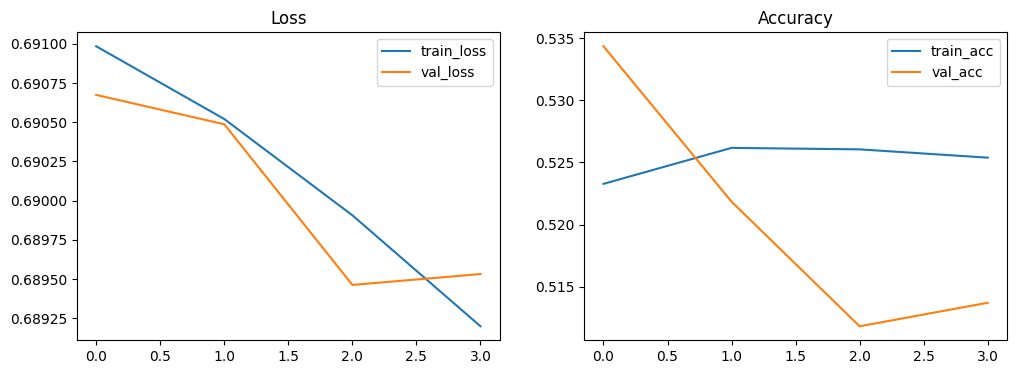

Model & stats saved. Done.


In [ ]:
# ---------------------------
# Transformer training & eval
# ---------------------------
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
import torch.optim as optim
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import os

# Config (tweak if needed)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 512         # reduce if OOM
EPOCHS = 8               # increase for final runs
LR = 2e-4
WEIGHT_DECAY = 1e-5
PATIENCE = 3             # early stopping patience
MODEL_SAVE = "best_transformer.pth"

print("Device:", DEVICE)
print("Sequences on device:", sequences.device, "shape:", sequences.shape)
print("Labels on device:", labels.device, "shape:", labels.shape)

# Convert to CPU tensors if needed for dataset creation (DataLoader handles pin_memory)
X = sequences.cpu()      # (N, SEQ_LEN, n_features)
y = labels.cpu()         # (N,)

# Train/val/test split (80/10/10). If you already split earlier, skip this and load saved splits.
N = len(X)
idx = np.arange(N)
np.random.seed(42)
np.random.shuffle(idx)

n_train = int(0.8 * N)
n_val   = int(0.1 * N)
train_idx = idx[:n_train]
val_idx   = idx[n_train:n_train + n_val]
test_idx  = idx[n_train + n_val:]

X_train, y_train = X[train_idx], y[train_idx]
X_val,   y_val   = X[val_idx],   y[val_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]

print("Train/Val/Test sizes:", len(X_train), len(X_val), len(X_test))
print("Train label dist:", np.bincount(y_train.numpy()))
print("Val   label dist:", np.bincount(y_val.numpy()))
print("Test  label dist:", np.bincount(y_test.numpy()))

train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_val, y_val)
test_ds = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True, num_workers=2)
test_loader  = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True, num_workers=2)

# --- Transformer model (small, efficient) ---
class TransformerClassifier(nn.Module):
    def __init__(self, n_features, d_model=128, nhead=4, num_layers=3, dim_feedforward=256, dropout=0.1):
        super().__init__()
        self.input_fc = nn.Linear(n_features, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead,
                                                   dim_feedforward=dim_feedforward,
                                                   dropout=dropout, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Linear(d_model, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        # x: (batch, seq_len, n_features)
        x = self.input_fc(x)              # -> (batch, seq_len, d_model)
        x = self.encoder(x)               # -> (batch, seq_len, d_model)
        x = x.mean(dim=1)                 # mean pool across seq dim -> (batch, d_model)
        logits = self.classifier(x)       # -> (batch, 2)
        return logits

n_features = X.shape[2]
print("n_features:", n_features)
model = TransformerClassifier(n_features=n_features, d_model=128, nhead=4, num_layers=3, dim_feedforward=256, dropout=0.15)
model = model.to(DEVICE)

# Class weights for imbalance
y_train_np = y_train.numpy()
classes = np.unique(y_train_np)
from sklearn.utils.class_weight import compute_class_weight
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_np)
class_weights = torch.tensor([cw[0], cw[1]], dtype=torch.float32).to(DEVICE)
print("Class weights:", class_weights.cpu().numpy())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

# training helpers
def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    tot_loss = 0.0
    preds_all = []
    trues_all = []
    for xb, yb in loader:
        xb = xb.to(DEVICE); yb = yb.to(DEVICE)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        tot_loss += loss.item() * xb.size(0)
        preds_all.append(logits.detach().cpu().numpy())
        trues_all.append(yb.detach().cpu().numpy())
    preds = np.concatenate(preds_all, axis=0)
    trues = np.concatenate(trues_all, axis=0)
    pred_labels = preds.argmax(axis=1)
    return tot_loss / len(loader.dataset), accuracy_score(trues, pred_labels)

def evaluate(model, loader, criterion):
    model.eval()
    tot_loss = 0.0
    preds_all = []
    trues_all = []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(DEVICE); yb = yb.to(DEVICE)
            logits = model(xb)
            loss = criterion(logits, yb)
            tot_loss += loss.item() * xb.size(0)
            preds_all.append(logits.detach().cpu().numpy())
            trues_all.append(yb.detach().cpu().numpy())
    preds = np.concatenate(preds_all, axis=0)
    trues = np.concatenate(trues_all, axis=0)
    pred_labels = preds.argmax(axis=1)
    return tot_loss / len(loader.dataset), accuracy_score(trues, pred_labels), pred_labels, trues

# Training loop with early stopping
best_val_acc = 0.0
best_epoch = 0
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(1, EPOCHS+1):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_acc, _, _ = evaluate(model, val_loader, criterion)
    train_losses.append(train_loss); val_losses.append(val_loss)
    train_accs.append(train_acc); val_accs.append(val_acc)
    print(f"[Epoch {epoch}] train_loss={train_loss:.4f} train_acc={train_acc:.4f} | val_loss={val_loss:.4f} val_acc={val_acc:.4f}")
    # save best
    if val_acc > best_val_acc + 1e-5:
        best_val_acc = val_acc
        best_epoch = epoch
        torch.save(model.state_dict(), MODEL_SAVE)
        print("  -> saved best model.")
    # early stop
    if epoch - best_epoch >= PATIENCE:
        print("Early stopping triggered.")
        break

# Load best model
if os.path.exists(MODEL_SAVE):
    model.load_state_dict(torch.load(MODEL_SAVE, map_location=DEVICE))
    print("Loaded best model from epoch", best_epoch)

# Final evaluation on test set
test_loss, test_acc, pred_labels, trues = evaluate(model, test_loader, criterion)
print("\nTEST ACC:", test_acc)
print(classification_report(trues, pred_labels, digits=4))
print("Confusion Matrix:\n", confusion_matrix(trues, pred_labels))

# Plot loss & accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label="train_loss")
plt.plot(val_losses, label="val_loss")
plt.legend(); plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(train_accs, label="train_acc")
plt.plot(val_accs, label="val_acc")
plt.legend(); plt.title("Accuracy")
plt.show()

print("Model & stats saved. Done.")


In [ ]:
import pandas as pd

nasdaq = pd.read_csv("nasdaq_listed.csv")
other  = pd.read_csv("other_listed.csv")

# Standardize column names
nasdaq = nasdaq.rename(columns={"Symbol": "ticker"})
other  = other.rename(columns={"ACT Symbol": "ticker"})

# Keep only the useful columns
nasdaq = nasdaq[["ticker", "Security Name"]]
other = other[["ticker", "Security Name"]]

all_listed = pd.concat([nasdaq, other], ignore_index=True)

print("Companies loaded:", all_listed.shape)
print(all_listed.head())


Companies loaded: (12066, 2)
  ticker                                      Security Name
0   AACB  Artius II Acquisition Inc. - Class A Ordinary ...
1  AACBR                Artius II Acquisition Inc. - Rights
2  AACBU                 Artius II Acquisition Inc. - Units
3   AACG  ATA Creativity Global - American Depositary Sh...
4   AADR                AdvisorShares Dorsey Wright ADR ETF


In [ ]:
import pandas as pd
import yfinance as yf
from tqdm import tqdm

# =====================================================
# 1. Load your dataset
# =====================================================
df = pd.read_parquet("/content/drive/MyDrive/work/eas508/final_ml_dataset_finbert.parquet")
print("Loaded:", df.shape)

tickers = sorted(df["ticker"].unique())
print("Total unique tickers:", len(tickers))

# =====================================================
# 2. Fetch Sector / Industry using yfinance
# =====================================================
sector_map = {}
industry_map = {}

print("\nFetching sector/industry for each ticker using yfinance...\n")

for t in tqdm(tickers):
    try:
        info = yf.Ticker(t).info
        sector_map[t] = info.get("sector", None)
        industry_map[t] = info.get("industry", None)
    except:
        sector_map[t] = None
        industry_map[t] = None

# =====================================================
# 3. Add columns into main dataframe
# =====================================================
df["sector"]   = df["ticker"].map(sector_map)
df["industry"] = df["ticker"].map(industry_map)

print("\nSector distribution:")
print(df["sector"].value_counts(dropna=False).head())

print("\nIndustry distribution:")
print(df["industry"].value_counts(dropna=False).head())

print("\nFinal dataset sample:")
print(df[["ticker", "sector", "industry"]].head())

# =====================================================
# 4. Save for future ML model use
# =====================================================
df.to_parquet("final_with_sector_industry.parquet")
print("\nSaved: final_with_sector_industry.parquet")


Loaded: (29669773, 23)
Total unique tickers: 7620

Fetching sector/industry for each ticker using yfinance...



100%|██████████| 7620/7620 [07:26<00:00, 17.07it/s]



Sector distribution:
sector
None                  25830198
Financial Services     1065562
Healthcare              625415
Industrials             456188
Technology              449432
Name: count, dtype: int64

Industry distribution:
industry
None                25830198
Banks - Regional      410353
Asset Management      394044
Biotechnology         260136
Medical Devices        88727
Name: count, dtype: int64

Final dataset sample:
  ticker      sector                industry
0      A  Healthcare  Diagnostics & Research
1      A  Healthcare  Diagnostics & Research
2      A  Healthcare  Diagnostics & Research
3      A  Healthcare  Diagnostics & Research
4      A  Healthcare  Diagnostics & Research

Saved: final_with_sector_industry.parquet


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

print("Loading dataset...")
df = pd.read_parquet("/content/final_with_sector_industry.parquet")
print("Loaded:", df.shape)

# -------------------------------------------------------------
# 1. TARGET LABEL
# -------------------------------------------------------------
df["movement_label"] = df["movement"].astype(int)

print("\nMovement distribution:")
print(df["movement_label"].value_counts())

# -------------------------------------------------------------
# 2. CATEGORICAL ENCODING
# -------------------------------------------------------------
cat_cols = ["sector", "industry"]

encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

df[cat_cols] = encoder.fit_transform(df[cat_cols])

# -------------------------------------------------------------
# 3. FEATURES
# -------------------------------------------------------------
FEATURES = [
    "sent_mean", "news_count",
    "prev_return",
    "sent_3d", "sent_7d",
    "volatility_7d",
    "vol_3d", "vol_7d",
    "finbert_mean", "fin_pos_mean", "fin_neg_mean",
    "sector", "industry"
]

TARGET = "movement_label"

# -------------------------------------------------------------
# 4. CLEAN EXTREME VALUES
# -------------------------------------------------------------
df[FEATURES] = df[FEATURES].replace([np.inf, -np.inf], np.nan)
df[FEATURES] = df[FEATURES].fillna(0)
df[FEATURES] = df[FEATURES].clip(-1e6, 1e6)

# -------------------------------------------------------------
# 5. TRAIN–TEST SPLIT
# -------------------------------------------------------------
train_df, test_df = train_test_split(df, test_size=0.20, shuffle=False)

X_train = train_df[FEATURES]
y_train = train_df[TARGET]

X_test = test_df[FEATURES]
y_test = test_df[TARGET]

print("\nTrain:", X_train.shape, "| Test:", X_test.shape)

# -------------------------------------------------------------
# 6. SCALE NUMERIC FEATURES
# -------------------------------------------------------------
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# ============================================================
# MODEL 1 — Logistic Regression
# ============================================================
print("\n===== Logistic Regression =====")
log_clf = LogisticRegression(max_iter=2000, n_jobs=-1)
log_clf.fit(X_train_s, y_train)
log_pred = log_clf.predict(X_test_s)

print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

# ============================================================
# MODEL 2 — Random Forest
# ============================================================
print("\n===== Random Forest =====")
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

# ============================================================
# MODEL 3 — XGBoost
# ============================================================
print("\n===== XGBoost =====")
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    objective="binary:logistic",
    tree_method="hist",
    random_state=42
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))

print("\n🔥 ML MODELS FINISHED WITH SECTOR + INDUSTRY INCLUDED!")


Loading dataset...
Loaded: (29669773, 25)

Movement distribution:
movement_label
0    16156165
1    13513608
Name: count, dtype: int64

Train: (23735818, 13) | Test: (5933955, 13)

===== Logistic Regression =====
Accuracy: 0.5354004201245207
              precision    recall  f1-score   support

           0       0.55      0.80      0.65   3176561
           1       0.50      0.23      0.32   2757394

    accuracy                           0.54   5933955
   macro avg       0.52      0.52      0.48   5933955
weighted avg       0.52      0.54      0.49   5933955

[[2538424  638137]
 [2118776  638618]]

===== Random Forest =====
Accuracy: 0.5395747018641024
              precision    recall  f1-score   support

           0       0.54      0.89      0.67   3176561
           1       0.52      0.14      0.22   2757394

    accuracy                           0.54   5933955
   macro avg       0.53      0.51      0.45   5933955
weighted avg       0.53      0.54      0.46   5933955

[[2822012

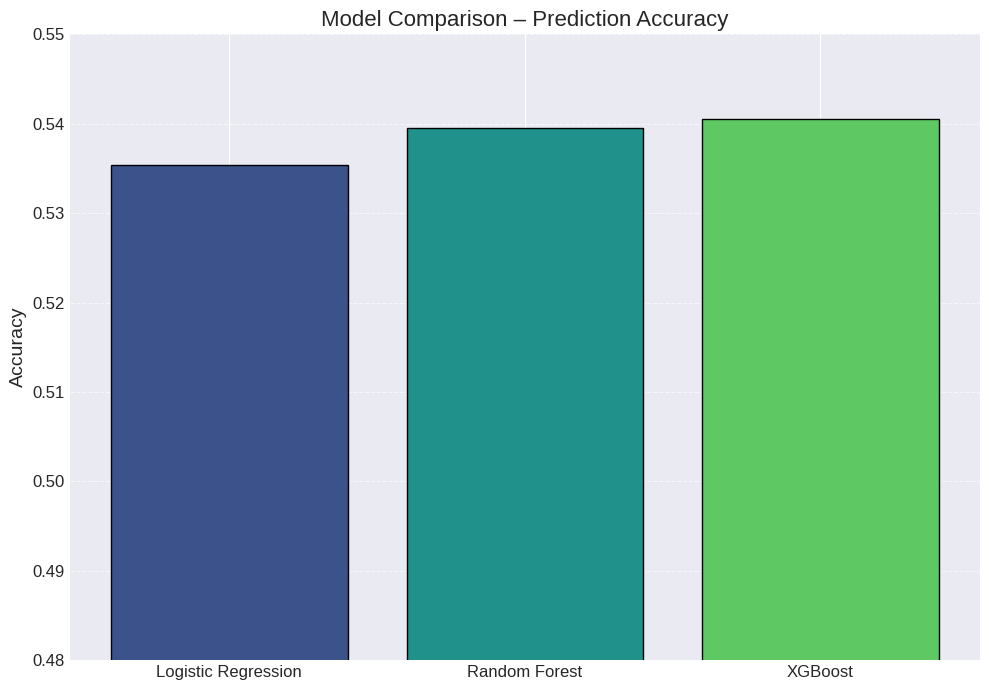

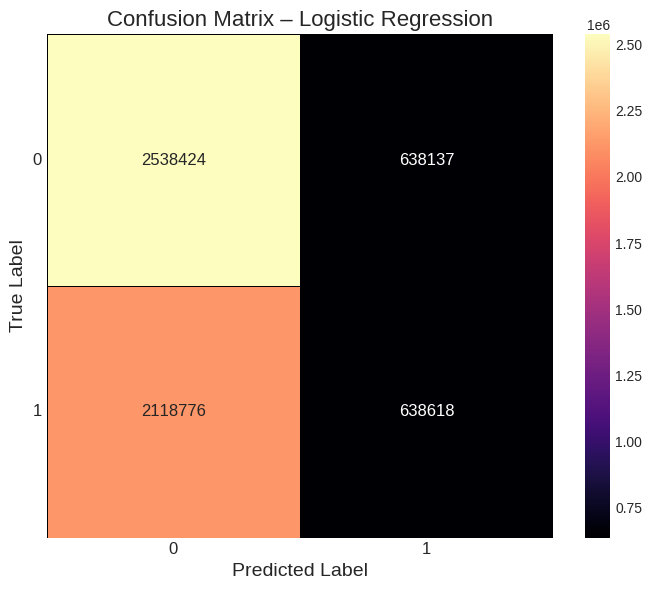

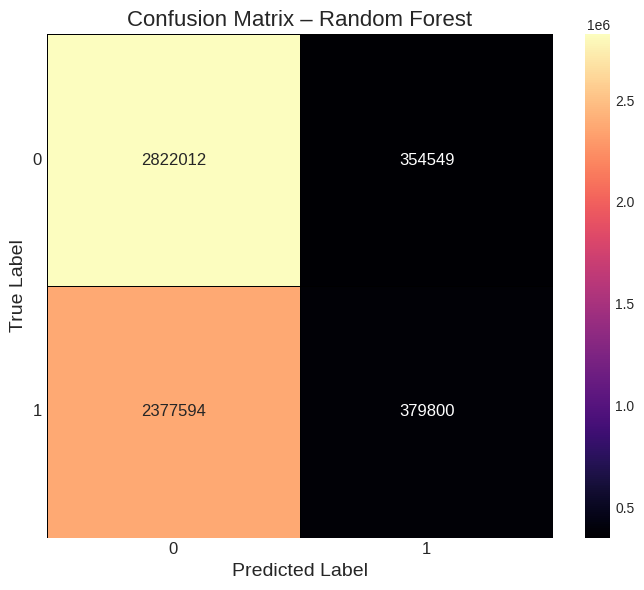

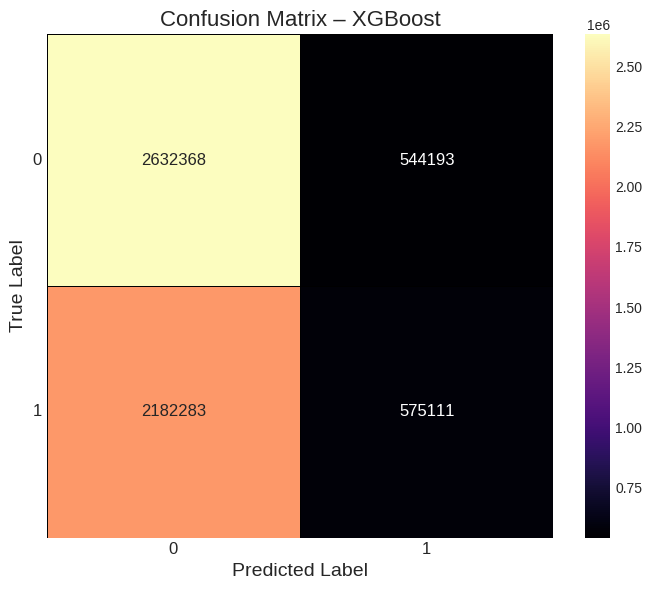

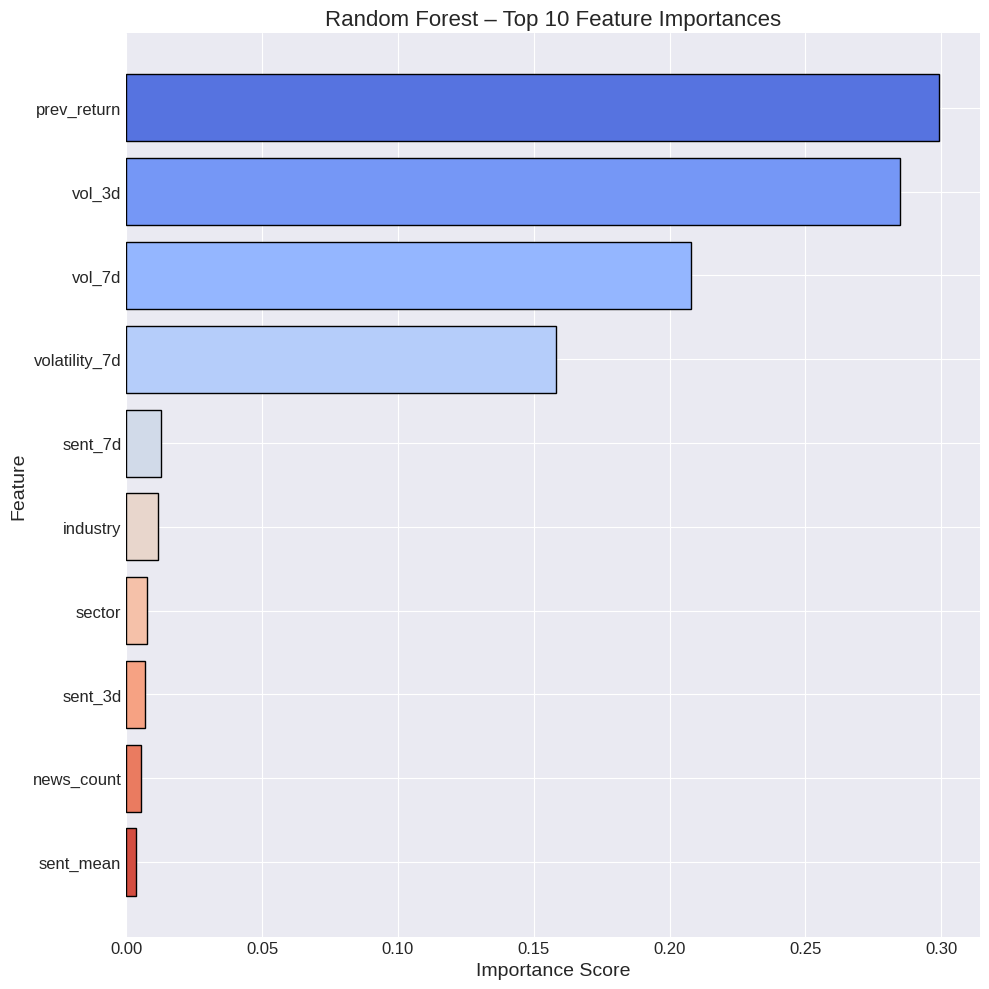

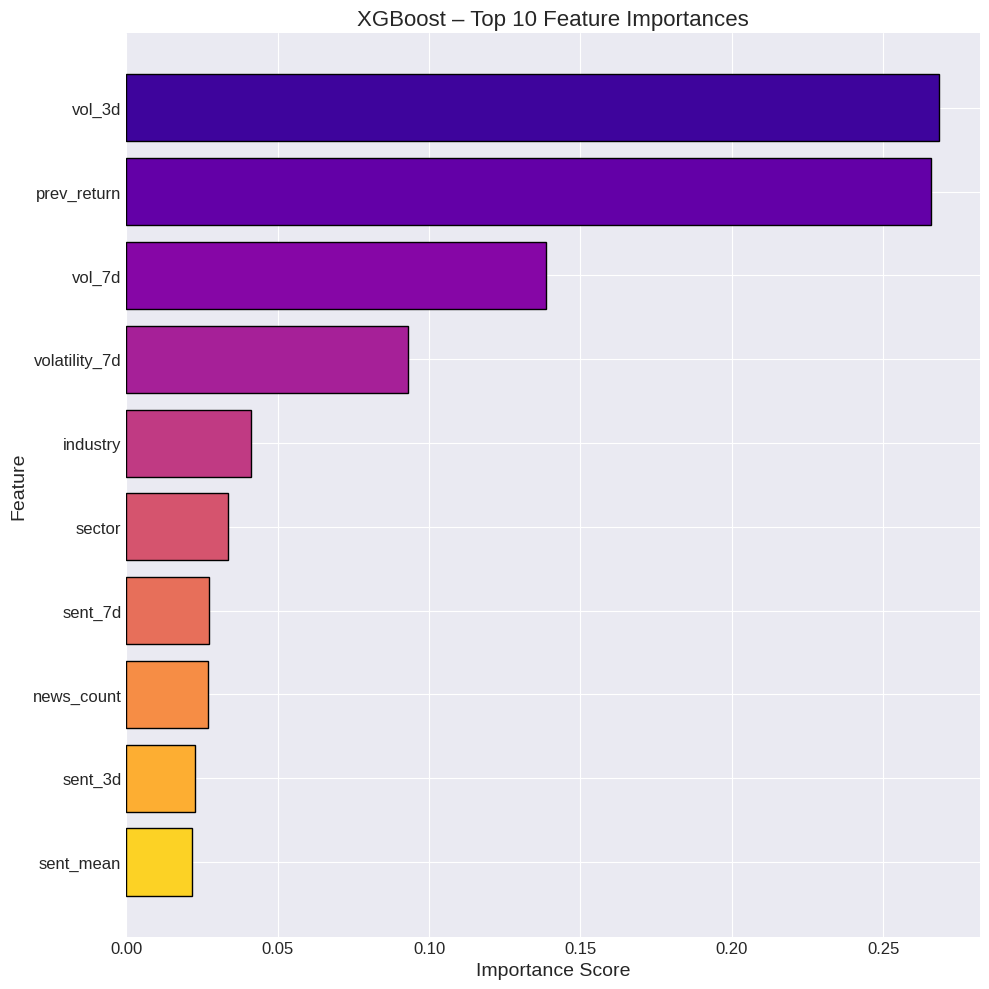

/tmp/ipython-input-2840071707.py:119: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: accuracy_score(x["movement_label"], x["pred"]))
/tmp/ipython-input-2840071707.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_acc.index, y=sector_acc.values, palette="crest", edgecolor='black')


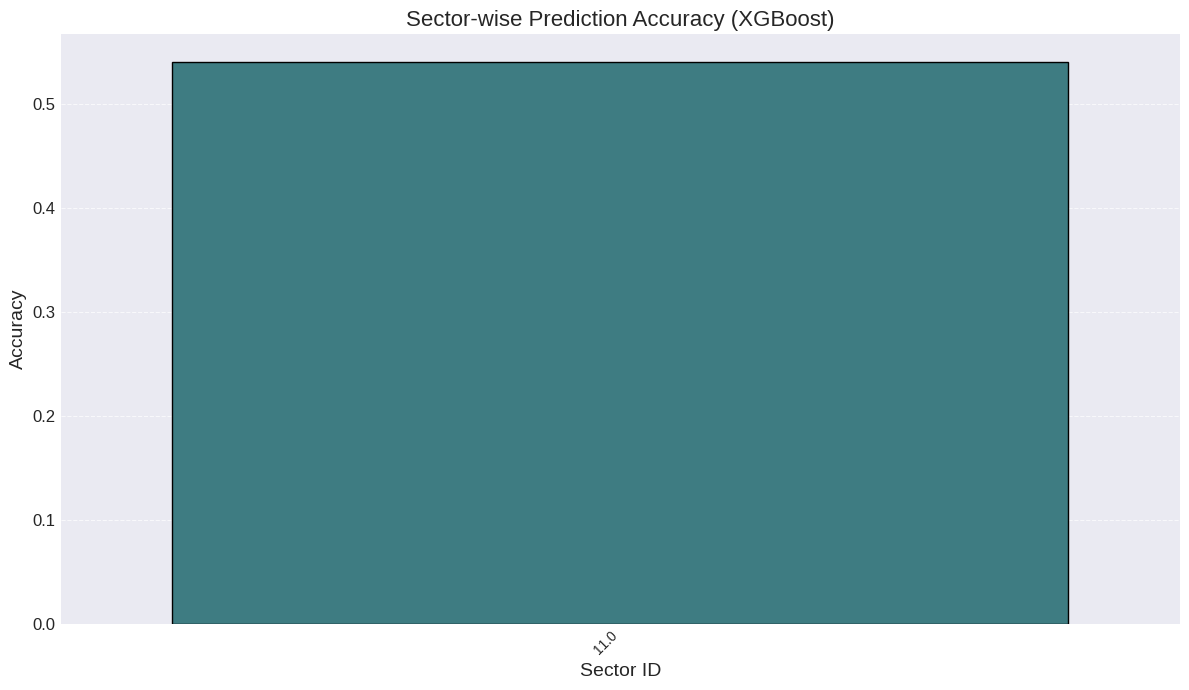

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create a directory to save plots if it doesn't exist
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

# Set a professional style for all plots
plt.style.use("seaborn-v0_8-darkgrid")

# ===========================
# 1. ACCURACY BAR CHART
# ===========================
accuracies = {
    "Logistic Regression": accuracy_score(y_test, log_pred),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "XGBoost": accuracy_score(y_test, xgb_pred),
}

plt.figure(figsize=(10, 7))
plt.bar(accuracies.keys(), accuracies.values(), color=sns.color_palette("viridis", len(accuracies)), edgecolor='black')
plt.ylabel("Accuracy", fontsize=14)
plt.title("Model Comparison – Prediction Accuracy", fontsize=16)
plt.ylim(0.48, 0.55) # Adjusted ylim to show differences better
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=0) # Keep x-axis labels horizontal
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "accuracy_bar_chart.png"))
plt.show()

# ===========================
# 2. CONFUSION MATRICES
# ===========================
models = {
    "Logistic Regression": log_pred,
    "Random Forest": rf_pred,
    "XGBoost": xgb_pred
}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="magma",
                linewidths=.5, linecolor='black',
                annot_kws={"size": 12}) # Increase annotation font size
    plt.title(f"Confusion Matrix – {name}", fontsize=16)
    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12, rotation=0) # Ensure y-labels are horizontal
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"confusion_matrix_{name.replace(' ', '_')}.png"))
    plt.show()

# ===========================
# 3. FEATURE IMPORTANCE (RF)
# ===========================
rf_importances = rf.feature_importances_
rf_features = X_train.columns

plt.figure(figsize=(10,10)) # Increased figure size
idx = np.argsort(rf_importances)[::-1]

# Select top N features for better readability on a poster
top_n = 10
idx = idx[:top_n]

plt.barh(rf_features[idx], rf_importances[idx], color=sns.color_palette("coolwarm", top_n), edgecolor='black')
plt.title(f"Random Forest – Top {top_n} Feature Importances", fontsize=16)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "rf_feature_importance.png"))
plt.show()

# ===========================
# 4. FEATURE IMPORTANCE (XGB)
# ===========================
xgb_importances = xgb.feature_importances_
xgb_features = X_train.columns

plt.figure(figsize=(10,10)) # Increased figure size
idx = np.argsort(xgb_importances)[::-1]

# Select top N features for better readability on a poster
top_n = 10
idx = idx[:top_n]

plt.barh(xgb_features[idx], xgb_importances[idx], color=sns.color_palette("plasma", top_n), edgecolor='black')
plt.title(f"XGBoost – Top {top_n} Feature Importances", fontsize=16)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "xgb_feature_importance.png"))
plt.show()

# ===========================
# 5. SECTOR-WISE ACCURACY
# ===========================
import pandas as pd

# attach predictions back to dataset
test_df_copy = test_df.copy()
test_df_copy["sector"] = test_df["sector"].values
test_df_copy["pred"] = xgb_pred  # best model

# Filter out sectors with very few samples if needed, or handle NaN gracefully
sector_acc = (
    test_df_copy.groupby("sector")
    .apply(lambda x: accuracy_score(x["movement_label"], x["pred"]))
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,7)) # Increased figure size
sns.barplot(x=sector_acc.index, y=sector_acc.values, palette="crest", edgecolor='black')
plt.title("Sector-wise Prediction Accuracy (XGBoost)", fontsize=16)
plt.xlabel("Sector ID", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(fontsize=10, rotation=45, ha='right') # Rotate and align for many categories
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "sector_wise_accuracy.png"))
plt.show()

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# -------------------------------
# 1️⃣ Device
# -------------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)
print("GPU name:", torch.cuda.get_device_name(0))

# -------------------------------
# 2️⃣ Load dataset
# -------------------------------
df = pd.read_parquet("/content/final_with_sector_industry.parquet")
print("Loaded:", df.shape)

# Target
df["movement_label"] = df["movement"].astype(int)

# -------------------------------
# 3️⃣ Encode categorical features
# -------------------------------
cat_cols = ["sector", "industry"]
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
df[cat_cols] = encoder.fit_transform(df[cat_cols])

# -------------------------------
# 4️⃣ Subset tickers for LSTM
# -------------------------------
unique_tickers = df["ticker"].unique()
sample_tickers = np.random.choice(unique_tickers, 1200, replace=False)
df = df[df["ticker"].isin(sample_tickers)].reset_index(drop=True)
print("Using tickers:", len(sample_tickers))

# -------------------------------
# 5️⃣ Features
# -------------------------------
FEATURES = [
    "sent_mean", "news_count",
    "prev_return",
    "sent_3d", "sent_7d",
    "volatility_7d",
    "vol_3d", "vol_7d",
    "finbert_mean", "fin_pos_mean", "fin_neg_mean",
    "sector", "industry"
]

df[FEATURES] = df[FEATURES].replace([np.inf, -np.inf], np.nan).fillna(0)
df[FEATURES] = df[FEATURES].clip(-1e6, 1e6)

scaler = StandardScaler()
df[FEATURES] = scaler.fit_transform(df[FEATURES])

# -------------------------------
# 6️⃣ Build sequences
# -------------------------------
SEQ_LEN = 30

def build_sequences(group):
    X, y = [], []
    vals = group[FEATURES].values
    labels = group["movement_label"].values
    if len(group) <= SEQ_LEN:
        return np.array([]), np.array([])
    for i in range(len(group) - SEQ_LEN):
        X.append(vals[i:i+SEQ_LEN])
        y.append(labels[i+SEQ_LEN])
    return np.array(X), np.array(y)

X_list, y_list = [], []
for t in df["ticker"].unique():
    sub = df[df["ticker"] == t]
    X_t, y_t = build_sequences(sub)
    if X_t.size == 0:
        continue
    X_list.append(X_t)
    y_list.append(y_t)

X = np.concatenate(X_list)
y = np.concatenate(y_list)

print("Final X:", X.shape, "Final y:", y.shape)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# -------------------------------
# 7️⃣ Train/Val/Test split
# -------------------------------
N = len(X_tensor)
train_end = int(0.80 * N)
val_end = int(0.90 * N)

X_train, X_val, X_test = X_tensor[:train_end], X_tensor[train_end:val_end], X_tensor[val_end:]
y_train, y_val, y_test = y_tensor[:train_end], y_tensor[train_end:val_end], y_tensor[val_end:]

print("Splits:", len(X_train), len(X_val), len(X_test))

# -------------------------------
# 8️⃣ Dataset + DataLoader
# -------------------------------
class SeqDS(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

BATCH_SIZE = 512  # bigger batch for GPU

train_dl = DataLoader(SeqDS(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
val_dl   = DataLoader(SeqDS(X_val, y_val), batch_size=BATCH_SIZE, num_workers=4, pin_memory=True)
test_dl  = DataLoader(SeqDS(X_test, y_test), batch_size=BATCH_SIZE, num_workers=4, pin_memory=True)

# -------------------------------
# 9️⃣ LSTM Model
# -------------------------------
class LSTMModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, 64, batch_first=True)
        self.fc = nn.Linear(64, 2)

    def forward(self, x):
        out, _ = self.lstm(x)
        last = out[:, -1, :]
        return self.fc(last)

model = LSTMModel(len(FEATURES)).to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

# -------------------------------
# 🔥 10️⃣ Train with Mixed Precision
# -------------------------------
scaler = torch.cuda.amp.GradScaler()

for epoch in range(3):
    model.train()
    total_loss = 0
    correct = 0

    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        opt.zero_grad()

        with torch.cuda.amp.autocast():
            pred = model(xb)
            loss = loss_fn(pred, yb)

        scaler.scale(loss).backward()
        scaler.step(opt)
        scaler.update()

        total_loss += loss.item() * len(xb)
        correct += (pred.argmax(1) == yb).sum().item()

    train_acc = correct / len(train_dl.dataset)
    print(f"[E{epoch+1}] Loss={total_loss/len(train_dl.dataset):.4f} Acc={train_acc:.4f}")

# -------------------------------
# 11️⃣ Evaluate Test
# -------------------------------
model.eval()
correct = 0
all_pred, all_true = [], []

with torch.no_grad():
    for xb, yb in test_dl:
        xb, yb = xb.to(device), yb.to(device)
        with torch.cuda.amp.autocast():
            preds = model(xb)
        ps = preds.argmax(1)

        correct += (ps == yb).sum().item()
        all_pred.extend(ps.cpu().numpy())
        all_true.extend(yb.cpu().numpy())

accuracy = correct / len(test_dl.dataset)
print("\n🔥 FINAL TEST ACCURACY:", accuracy)


Device: cuda
GPU name: Tesla T4
Loaded: (29669773, 25)
Using tickers: 1200
Final X: (4711773, 30, 13) Final y: (4711773,)
Splits: 3769418 471177 471178


/tmp/ipython-input-581411282.py:144: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/tmp/ipython-input-581411282.py:155: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[E1] Loss=0.6831 Acc=0.5498
[E2] Loss=0.6823 Acc=0.5507
[E3] Loss=0.6820 Acc=0.5513


/tmp/ipython-input-581411282.py:179: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():



🔥 FINAL TEST ACCURACY: 0.5358484479326284


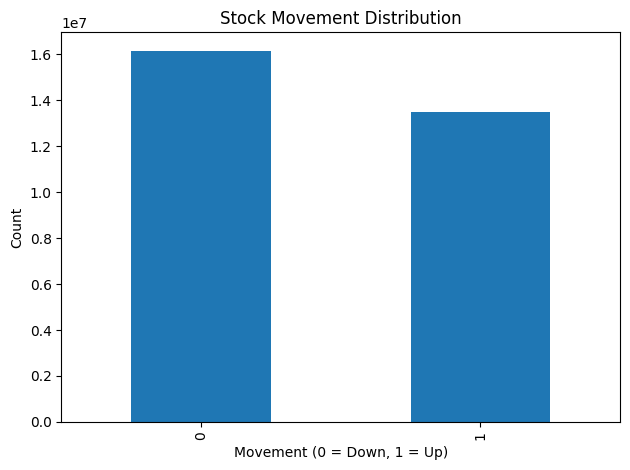

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet("/content/drive/MyDrive/work/eas508/final_with_sector_industry.parquet")

df['movement'].value_counts().plot(kind='bar')
plt.title("Stock Movement Distribution")
plt.xlabel("Movement (0 = Down, 1 = Up)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movement_distribution.png", dpi=300)
plt.show()


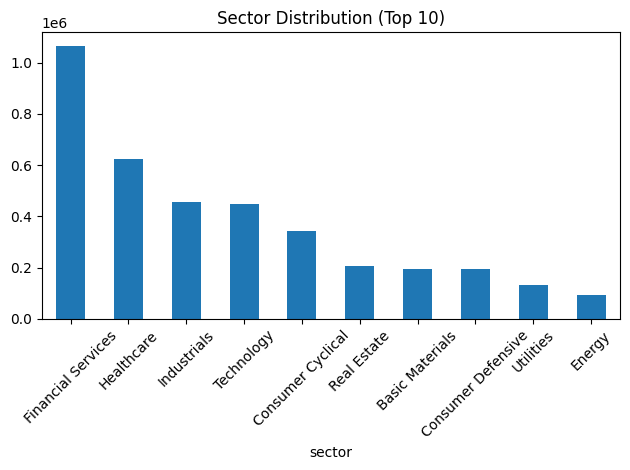

In [ ]:
df['sector'].value_counts().head(10).plot(kind='bar')
plt.title("Sector Distribution (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sector_distribution.png", dpi=300)
plt.show()


Parsed losses: [0.6831, 0.6823, 0.682]
Parsed accs: [0.5498, 0.5507, 0.5513]


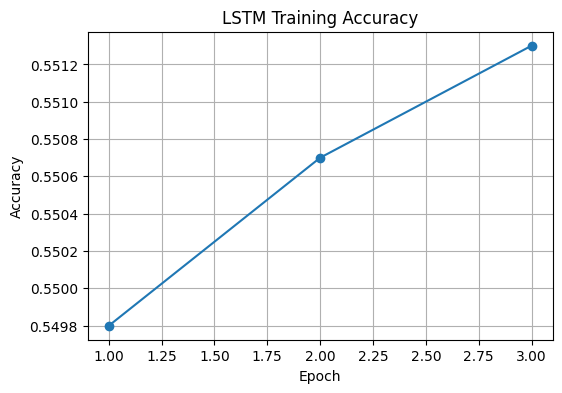

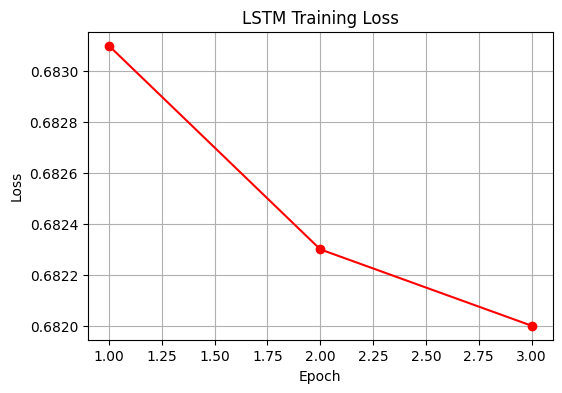

In [ ]:
import re
import matplotlib.pyplot as plt

# Paste your log text here manually from the output
logs = """
[E1] Loss=0.6831 Acc=0.5498
[E2] Loss=0.6823 Acc=0.5507
[E3] Loss=0.6820 Acc=0.5513
"""

# Extract losses & accuracies using regex
epochs = []
losses = []
accs = []

for line in logs.strip().split("\n"):
    m = re.search(r"\[E(\d+)\] Loss=([0-9.]+) Acc=([0-9.]+)", line)
    if m:
        epochs.append(int(m.group(1)))
        losses.append(float(m.group(2)))
        accs.append(float(m.group(3)))

print("Parsed losses:", losses)
print("Parsed accs:", accs)

# Plot Accuracy
plt.figure(figsize=(6,4))
plt.plot(epochs, accs, marker="o")
plt.title("LSTM Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(6,4))
plt.plot(epochs, losses, marker="o", color="red")
plt.title("LSTM Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
